### LOGISTIC REGRESSION:

   * Linear Regression (Lasso and Ridge) - Continuous label 
   * Logistic Regression - Categorical Label
   * Logistic Regression is a classification algorithm designed to predict categorical target labels.
   * Interpreting Results:
      * Odds Ratio and coefficients
        * Classification Metrics
            * Accuracy
            * Precision
            * Recall
        * ROC Curves (Receiver Operator characteristic Curves)
   * Mutliclass classification with Logistic Regression
   * Logistic Regression allows us to predict a categorical label based on historical feature data.
   * The Categorical target column is two or more discrete class label
   * Logistic Regression works by transforming a Linear Regression into a classification model through the use of logistic function.
   * The logistic funciton a.k.a Sigmoid Function is given by sigma(x) = 1/(1+e^(-x))
   * The odds of an event with probability p is defined as the chance of the event happening divided by the chance of the event not happening. **p/(1-p)**.
   * Logistic function allows us to solve the coefficient and the feature x in terms of *log odds*.
       ln(y'/(1-y')) = summation of 1 to n (Beta(i) * x(i))
   * Since the log odds scale is non linear the beta value can not be directly iinked to "one unit increase" as it could be in Linear Regression
   * Sign of Coefficient:
       * **Positive Beta** indicates an **increase in likelihood of belonging to 1 class** with **increase in associated X feature.**
       * **Negative Beta** indicates an **decrease in likelihood of belonging to 1 class** with **increase in associated X feature.**
       
   * Magnitude of Coefficient:
       * Harder to directly interpret magnitude of Beta directly, especially when we could have discrete and continous X feature values
       * We can however begin to use **odd ratio** esentially comparing magnitudes against each other.
       * Comparing the magnitutdes of coefficients against each other can lead to insight over which features have the strongest feature on prediction output

### Logistic Regression Best fit

* Logistic Regression uses **Maximum Likelihood** to find the best fitting model.
* Unfortunately, even in log odds targets are at infinity, making RSS (residual sum of squares) infeasible
* Likelihood = Product of probabilities of belonging to class 1
* Note in practice we actually maximize the log of the likelihood.

### EXPLORATORY DATA ANALYSIS

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('C:/Users/Manikandan/Desktop/Nandhu PG/Udemy ML Course/DATA/hearing_test.csv')  # reads the CSV file

In [5]:
df.head() # Reads the head of the df

# Always calrify what the values of the feature mean in the description

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts() # gives the count of each category in the column test_results

1    3000
0    2000
Name: test_result, dtype: int64

C:\Users\Manikandan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


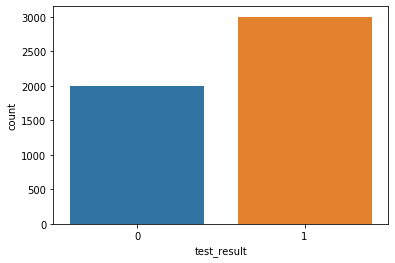

In [8]:
sns.countplot(df['test_result']) # This is same as sns.countplot(data = df, x='test_result')

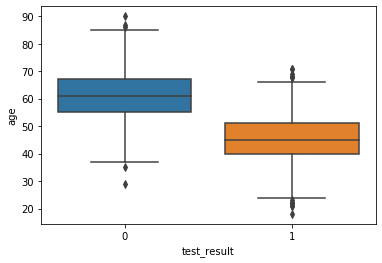

In [10]:
sns.boxplot(x='test_result', y= 'age', data = df)
# The kind of question this answers is, is there a difference between ages and the test result, and here we can see the distribution.
# We can see that those who didn't pass the test are of higher age

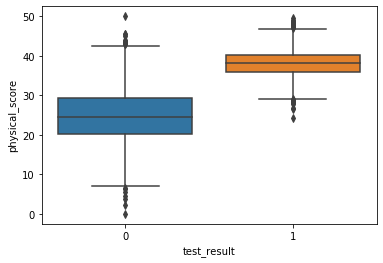

In [11]:
sns.boxplot(x='test_result', y= 'physical_score', data = df)

# Gives the distribution between the test_results and the physical score based on individuals physical fitness

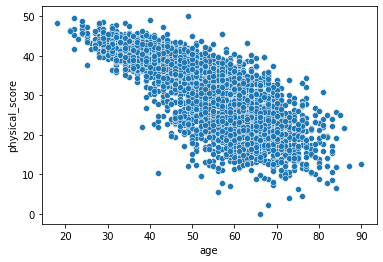

In [12]:
sns.scatterplot(x='age', y='physical_score', data=df) 

# Here we can see the relationship between the age and the physical score. the younger the age. the more they are physically fit.

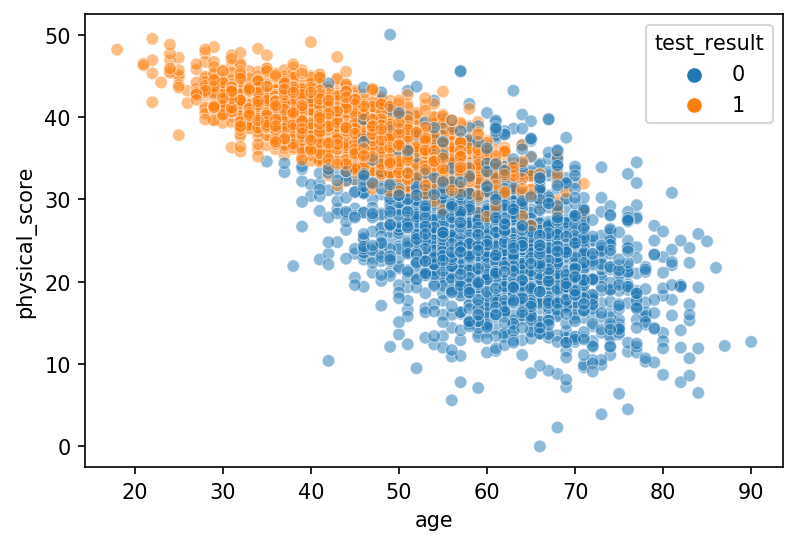

In [14]:
plt.figure(dpi=150) # dpi = dots per inch
sns.scatterplot(x='age', y='physical_score', hue='test_result' ,data=df, alpha = 0.5) #The hue is used to see the relationship based on the three entities.
# We can get from the plot that if you are young and does physical fits, then you are more likely to pass the test

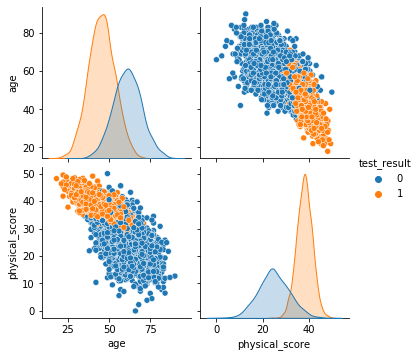

In [16]:
sns.pairplot(data=df, hue= 'test_result' ) # Gives the relationship for all features and gives the result based on the hue

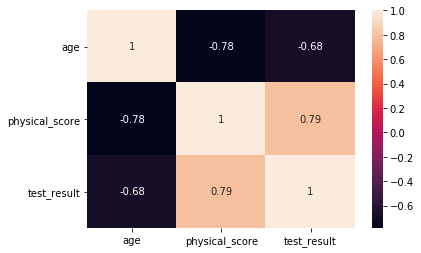

In [17]:
sns.heatmap(df.corr(), annot= True) # Gives the heatmap with the correlation between the feature along with the annotation

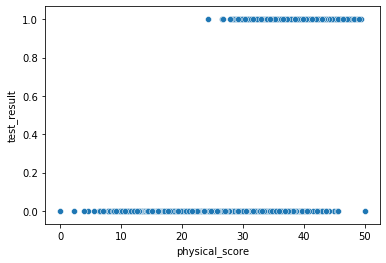

In [18]:
sns.scatterplot(x='physical_score', y='test_result', data=df)
# The below given plot may or maynot be informative as the physical score is a continous varible and the test_results are a label of 0 and 1.
# When we have a plot like this then we can use box plot to have a better view

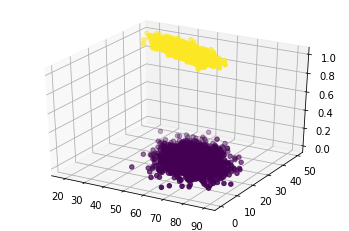

In [22]:
from mpl_toolkits.mplot3d import Axes3D # Imports 3D plots
fig = plt.figure() # Creation of the figure
ax = fig.add_subplot(111,projection='3d') # Adding subplots to the figure with a 3D projection
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']) # The age, physical_score and the test_results are the x, y and z axis values
# The c is the color and the color is based on the test_result.

### CREATING AND TRAINING A MODEL

In [23]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [25]:
X= df.drop('test_result',axis=1) # creates a data frame with the columns except test_result

In [26]:
y=df['test_result'] # Creating the y with the test result column

In [27]:
from sklearn.model_selection import train_test_split # Imports the train, test split model

In [28]:
from sklearn.preprocessing import StandardScaler # Imports Standard Scaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) # Test size is 10 percent of the entire df

In [30]:
scaler = StandardScaler() # Creating an instance of scaler.

In [31]:
Scaled_X_train = scaler.fit_transform(X_train) # Scaling the training data, we don't want the scaling information to be leaked on the test data so we don't fit to the test data
Scaled_X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression # Imports the Logistic Regression value from the linear model

In [34]:
help(LogisticRegression) # gives all the functions and the details for the model

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 's

In [35]:
log_model = LogisticRegression() # Creating an instance of Logistic Regression

In [36]:
log_model.fit(Scaled_X_train,y_train) # Fitting the training datas over the Logistic Regerssion Model

C:\Users\Manikandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
log_model.coef_ #Gives the coefficient of the log_model

array([[-0.94844455,  3.46102198]])

In [38]:
y_pred= log_model.predict(Scaled_X_test) # Gives the prediction of the logistic model over the Scaled_X_test data

# The predictions are the ones and zero. We can predict the probability as well

In [39]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [41]:
y_pred= log_model.predict_proba(Scaled_X_test) # The predict proba is used to predict the probability 
# We can see two sets of terms in the results where one is the probability of the instance belonging to the zero class and one class 

In [42]:
y_pred

array([[2.39005561e-02, 9.76099444e-01],
       [2.69698764e-02, 9.73030124e-01],
       [9.89225990e-01, 1.07740095e-02],
       [1.91056660e-03, 9.98089433e-01],
       [9.75054367e-01, 2.49456327e-02],
       [9.89686936e-01, 1.03130638e-02],
       [7.41573294e-02, 9.25842671e-01],
       [1.71337369e-02, 9.82866263e-01],
       [9.97072348e-01, 2.92765161e-03],
       [3.31022564e-02, 9.66897744e-01],
       [8.32184766e-02, 9.16781523e-01],
       [9.95363444e-03, 9.90046366e-01],
       [7.10677269e-03, 9.92893227e-01],
       [9.34466341e-01, 6.55336590e-02],
       [1.16840242e-04, 9.99883160e-01],
       [6.60471333e-02, 9.33952867e-01],
       [9.89140054e-01, 1.08599460e-02],
       [2.80716253e-03, 9.97192837e-01],
       [5.59891307e-04, 9.99440109e-01],
       [9.96530152e-01, 3.46984800e-03],
       [8.81906309e-01, 1.18093691e-01],
       [1.31206602e-01, 8.68793398e-01],
       [5.45825813e-01, 4.54174187e-01],
       [3.44506769e-02, 9.65549323e-01],
       [3.984542

### CLASSIFICATION PERFORMANCE METRICS - CONFUSION MATRIX AND ACCURACY

* Confusion Matrix:
* A **true positive** is an outcome where the model correctly predicts the positive class. 
* A **true negative** is an outcome where the model correctly predicts the negative class.
* A **false positive** is an outcome where the model incorrectly predicts the positive class. 
* A **false negative** is an outcome where the model incorrectly predicts the negative class.

* Accuracy = (True Positive(TP) + True Negative)/100
* This is Accuracy Paradox:
    * Any classifier dealing with **imbalanced** classes has to confront the issue of the accuracy paradox
    * **Imbalanced** classes will always result in a distorted accuracy reflecting better performance than what is truely warranted.
    * Imbalanced classes are oftern found in real world data sets
        * Medical condition s can affect small portion of the population.
        * Fraud is not coomon (Real vs Fraud credit card usage)
    


### CLASSIFICATION PERFORMANCE METRICS - PRECISON, RECALL, F-1 SCORE

* **Recall (a.k.a) sensitivity - answers the question, when it actually is a positive case, how often is it correct? **
    * The answer to the above question can be obtained by using the formula **True Positive/Total Number of actual positive **
    * A recall value of 0 alerts us that the model isn't catching any cases.
* **Precision answers the question, When prediction is positive, how often is it correct?**
    * The answer to the above question can be obtained by using the formula **True Positive / Total Number of predicted positive**
    * When the prediction is zero, alerts us that the model isn't working properly

* Recall and Precision can help illuminate our performance specifically in regards to the relevant or positive case.
* Depending on the model, there is typically a trade-off between precision and recall.
* Since precision and recall are related to each other through the numerator (TP), we often also report the **F1-Score, which is the harmonic mean of precision and recall.** 
 
     *  **F= ((2* Precision * recall)/(precision+recall))**
* The Harmonic mean (instead of the normal mean) allows the entire harmonic mean to go to zero if **either** precision or recall ends up being zero        

### CLASSIFICATION PERFORMANCE METRICS - ROC CURVES

* An **ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds**. This curve plots two parameters: True Positive Rate. False Positive Rate.
* By changing the cut-off limits we can adjust our True vs False Positives!
*  A perfect model will have a Zero False Postive Rate and a 100 percent true Positive rate.
* Smaller data set the ROC curves in not that smooth.
* AUC (Area under the Curve), allows us to compare ROC's for differnet model. The perfect AUC would be 1.


### LOGISTIC REGRESSION WITH SCIKIT LEARN - PERFORMANCE EVALUATION

In [45]:
log_model.coef_ # Gives the coefficients of the model

# As the age increase the odds of the test_result decreases.
# As the physical ratio increase the ones of the test_Result increases.

# Note from the result of the coefficient we get to know which is a stronger predictor (The one with the larger value is more likely to be a predictor)

array([[-0.94844455,  3.46102198]])

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # Imports the mentioned metrics from the metrics library

In [51]:
y_test.head() #Gives y_test values

1718    1
2511    1
345     0
2521    1
54      0
Name: test_result, dtype: int64

In [48]:
y_pred = log_model.predict(Scaled_X_test) # y_pred stores the prediction obtained from the log_model with Scaled_X_test values

In [49]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [50]:
accuracy_score(y_test,y_pred) # Gives the accuracy between the y_test and the y_pred

0.93

In [52]:
confusion_matrix(y_test,y_pred) # This builds a confusion matric in the below given format
# [true positive  false negative]
# [false positive true negative]

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [ ]:
pip install --upgrade scikit-learn

In [58]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Manikandan\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)